# A Equação de Schrödinger em Uma Dimensão

Nesse notebook vamos resolver a Equação de Schrödinger estacionária para um potencial arbitrário em uma dimensão, a equação de Schrödinger estacionária pode ser escrita como 

$$ \hat H| \psi \rangle = E | \psi \rangle .$$

Se vamos observar um estado quântico em uma caixa com relação à posição, podemos multiplicar o 'ket' $| \psi \rangle $ pelo 'bra' $ \langle x | $ e obter a função de onda 


$$ \langle x |\hat H| \psi \rangle = E \langle x | \psi \rangle $$


$$ -\frac{\hbar^2}{2 m}\frac{\partial^2 \psi(x)}{\partial x^2}+V(x)\psi(x) = E \psi(x).$$


Prorém para resolvermos esse problema precisamos discretizá-lo. Ou seja, escolher $N$ pontos igualmente espaçados, por um comprimento $dx = \frac{L}{N}$ onde $L$ é o comprimento da 'caixa' de uma dimensão na qual resolveremos o nosso problema. Para resolver precisamos impor a condição de contorno 

$$ \psi(0) = \psi(L) = 0 \rightarrow \psi_{-1} = \psi_{N+1} = 0 $$

o que define o problema como um problema de Sturm–Liouville.


Ou seja, as soluções que encontraremos vão ser autoestados $\psi_n(x)$ (autovetores ou autofunções) e autovalores $E_n$. 

## Discretização

De volta à discretização, para resolvermos o problema vamos separar a função $\psi(x)$ em $N$ subintervalos, então na verdade teremos $\psi_i$ com $i = 0,1,2,3,...,N$, ou de outra forma, a função vai ser substituída por uma 'tupla' 

$$ \psi(x) \rightarrow \begin{pmatrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_N \end{pmatrix}.$$ 


Enquanto que os operadores $\frac{\partial^2 }{\partial x^2}$ e $V(x)$ também precisam ser discretizados. Para cada ponto x podemos escrever $V(x) \rightarrow V_i$ assim como fizemos com a função $\psi$. Para a derivada segunda podemos usar a aproximação de diferenças finitas, tal que 

$$ \frac{\partial^2 \psi(x)}{\partial x^2} \approx \frac{\psi(x+dx)-2\psi(x)+\psi(x-dx)}{(dx)^2} = \frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(dx)^2}. $$

Ou seja, a equação 

$$ -\frac{\hbar^2}{2m}\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(dx)^2} + V_i\psi_i = \psi_i E $$

precisa valer para todos os valores de $i = 0,1,2, ... , N$. 

Logo deve valer a equação matricial 

$$ \begin{bmatrix} 
\frac{\hbar^2}{(dx)^2 m} + V_0 & -\frac{\hbar^2}{2m (dx)^2} & 0 & 0 & ... & 0 \\
-\frac{\hbar^2}{2m (dx)^2} & \frac{\hbar^2}{m (dx)^2} + V_1 & -\frac{\hbar^2}{2m (dx)^2} & 0 & ... & 0 \\
0 & -\frac{\hbar^2}{2m (dx)^2} & \frac{\hbar^2}{m (dx)^2} + V_2 & -\frac{\hbar^2}{2m (dx)^2} & ... & \vdots \\
\vdots & 0 & \ddots & \ddots& \ddots & -\frac{\hbar^2}{2m (dx)^2} \\
  &   &   &   &  &  &  \\
0 & 0 & 0 & 0 & -\frac{\hbar^2}{2m (dx)^2} & \frac{\hbar^2}{m (dx)^2} + V_2 
\end{bmatrix}\begin{pmatrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_N \end{pmatrix} = E \begin{pmatrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_N \end{pmatrix}. $$

Portanto, agora só precisamos resolver essa equação matricial e encontrar os autovalores e autovetores da primeira matriz que multiplica o problema, a Hamiltoniana. Para isso um pacote numérico de álgebra linear pode vir muito a calhar. 

Vamos definir $\hbar = m = 1 $ prosseguir com a parte numérica do problema. 

$$ \begin{bmatrix} 
\frac{1}{(dx)^2} + V_0 & -\frac{1}{2 (dx)^2} & 0 & 0 & ... & 0 \\
-\frac{1}{2 (dx)^2} & \frac{1}{(dx)^2} + V_1 & -\frac{1}{2 (dx)^2} & 0 & ... & 0 \\
0 & -\frac{1}{2 (dx)^2} & \frac{1}{(dx)^2} + V_2 & -\frac{1}{2 (dx)^2} & ... & \vdots \\
\vdots & 0 & \ddots & \ddots& \ddots & -\frac{1}{2 (dx)^2} \\
  &   &   &   &  &  &  \\
0 & 0 & 0 & 0 & -\frac{1}{2 (dx)^2} & \frac{1}{ (dx)^2} + V_2 
\end{bmatrix}\begin{pmatrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_N \end{pmatrix} = E \begin{pmatrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_N \end{pmatrix}. $$

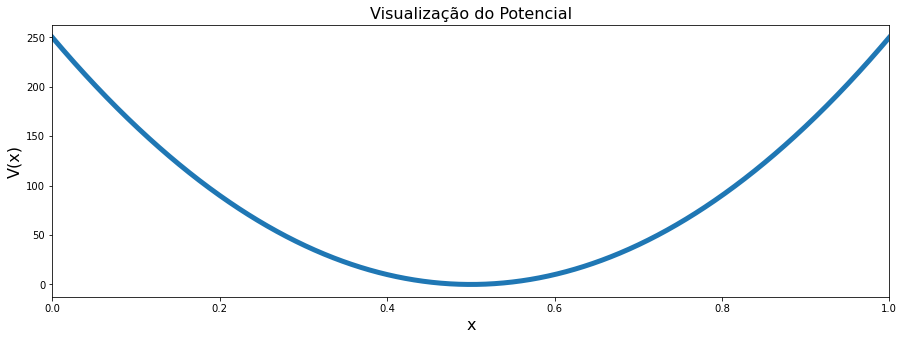

In [92]:
# importando bibliotecas necessárias
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
# Para isso precisamos definir nosso problema em termos das quantidades que usaremos, como L, N e o potencial V

L = 1 

N = 1500

dx = L/N

def V(x): #definindo a função potencial  
    return 1000*(x-1/2)**2

# Plotando a função potencial 
plt.figure(figsize=(15,5))
x = np.linspace(0,1,N)
y = V(x)
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 16)
plt.show()

## Construindo a ~matriz~ Hamiltoniana 

Para construir a matriz hamiltoniana podemos perceber que ela pode ser separada em 3 matrizes. 

$$ \begin{bmatrix} \frac{1}{(dx)^2} + V_0 & -\frac{1}{2 (dx)^2}& ... & 0 \\
-\frac{1}{2 (dx)^2}&  \frac{1}{(dx)^2} + V_1 &   & \vdots \\
\vdots &  & \ddots & -\frac{1}{2 (dx)^2} \\
0 & ... & -\frac{1}{2 (dx)^2} &  \frac{1}{(dx)^2} + V_N \end{bmatrix} = 
\begin{bmatrix} \frac{1}{(dx)^2} + V_0 & 0 & ... & 0 \\
0 &  \frac{1}{(dx)^2} + V_1 &   & \vdots \\
\vdots &  & \ddots & 0\\
0 & ... & 0 &  \frac{1}{(dx)^2} + V_N \end{bmatrix}+  - 
\begin{bmatrix} 0 & -\frac{1}{2 (dx)^2}& ... & 0 \\
-\frac{1}{2 (dx)^2}&  0 &   & \vdots \\
\vdots &  & \ddots & -\frac{1}{2 (dx)^2} \\
0 & ... & -\frac{1}{2 (dx)^2} &  0 \end{bmatrix} $$


In [95]:
# Vamos construir a hamiltoniana NxN 
# A primeira matriz é simples de escrever, afinal ela vai ser uma matriz diagonal com os termos 
# 1/dx + V_i 
# para isso podemos construir um vetor 

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

#E com isso encontramos os autovalores w e autovetores v do problema 

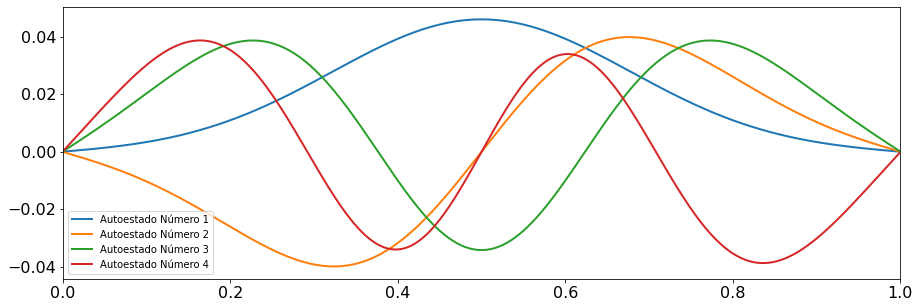

In [96]:
#Podemos plotar os auto vetores (ou autoestados)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()


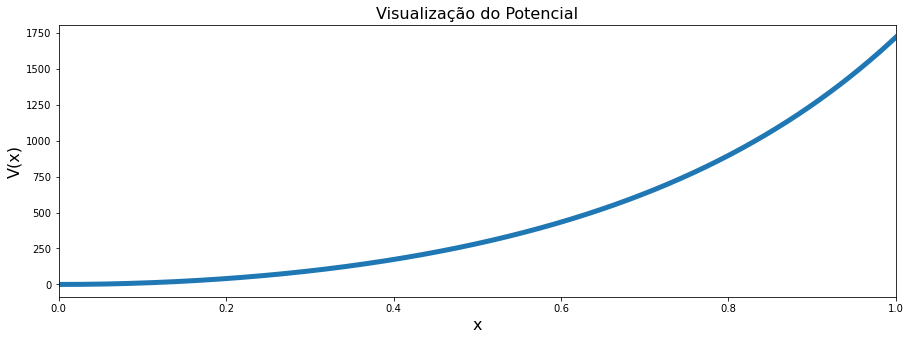

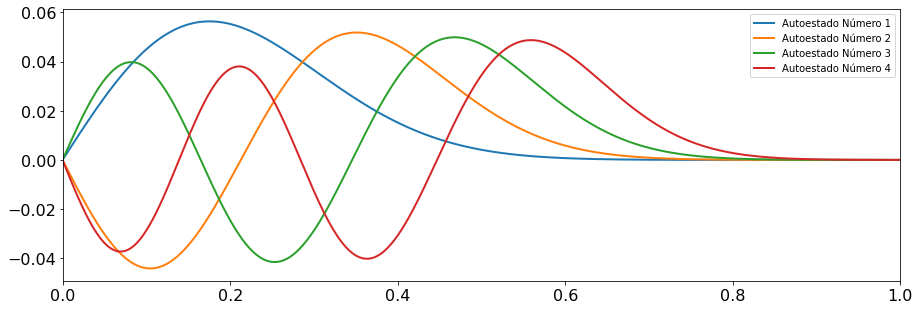

In [142]:
#Agora podemos experimentar com quaisquer estados 


def V_2(x): #definindo a função potencial  
    return 1000*np.exp(x**2)-1000

x = np.linspace(0,1,N)
y = V_2(x)
plt.figure(figsize=(15,5))
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 16)
plt.show()

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V_2(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

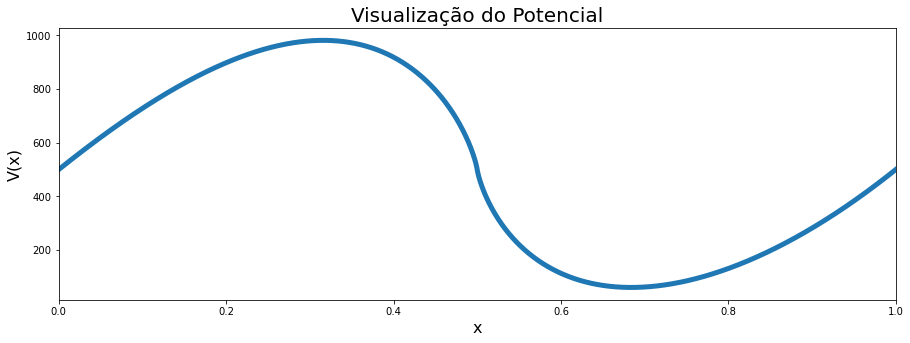

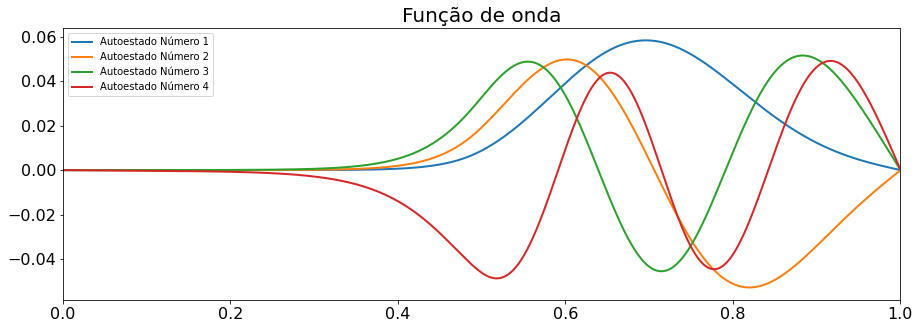

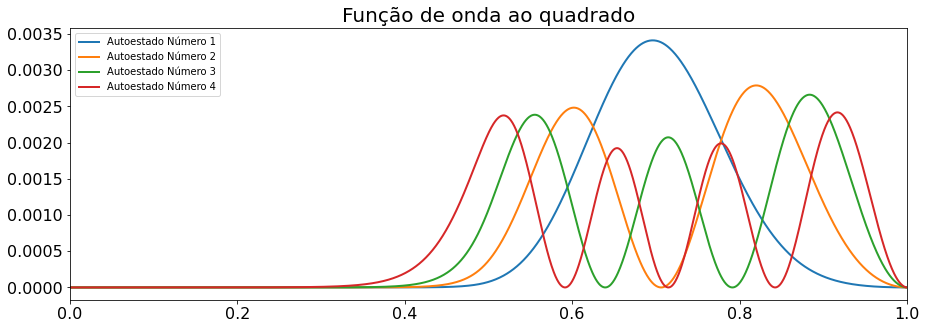

In [161]:

def V_2(x): #definindo a função potencial  
    return 5000*np.abs(2*(x-0.5))**((x-0.5)/2)-4500

x = np.linspace(0,1,N)
y = V_2(x)
plt.figure(figsize=(15,5))
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 20)
plt.show()

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V_2(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i]**2,lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda ao quadrado',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

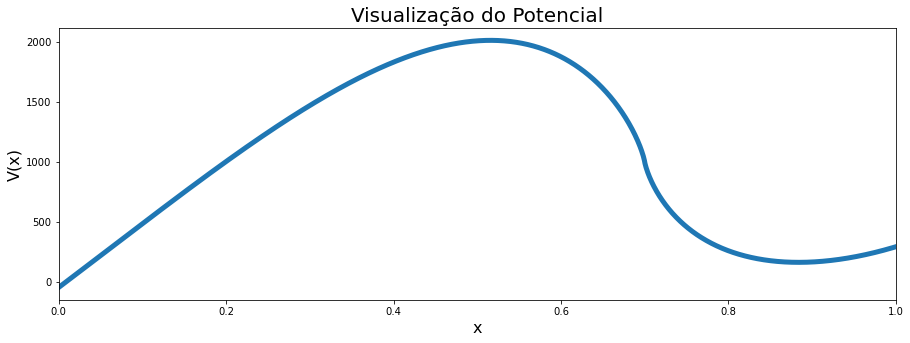

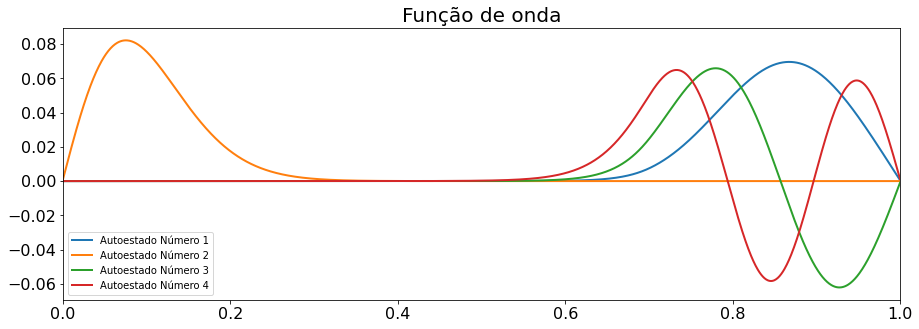

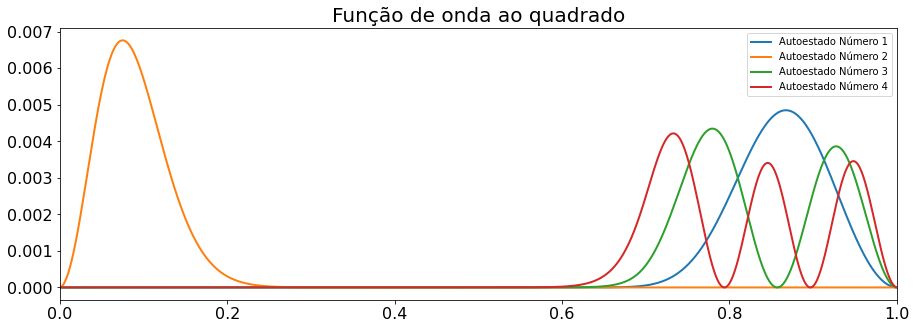

In [160]:

def V_2(x): #definindo a função potencial  
    return 5000*np.abs(2*(x-0.7))**((x-0.7))-4000

x = np.linspace(0,1,N)
y = V_2(x)
plt.figure(figsize=(15,5))
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 20)
plt.show()

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V_2(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i]**2,lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda ao quadrado',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

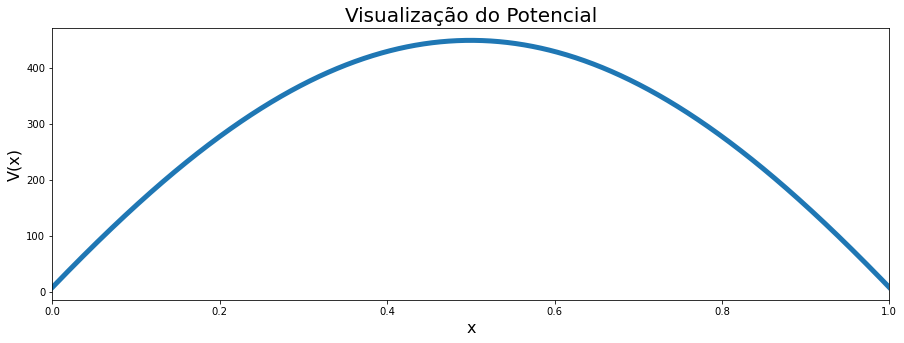

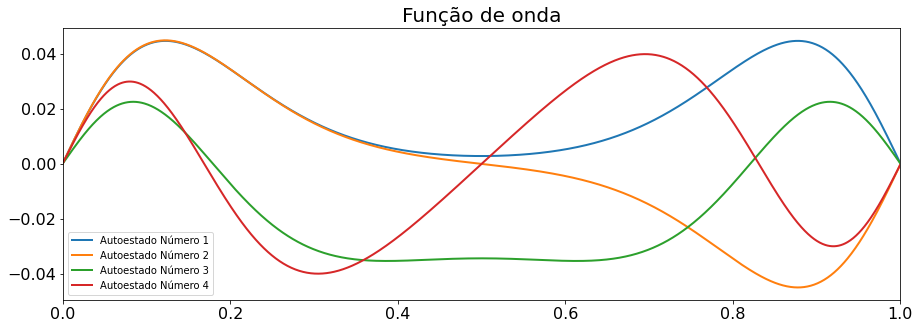

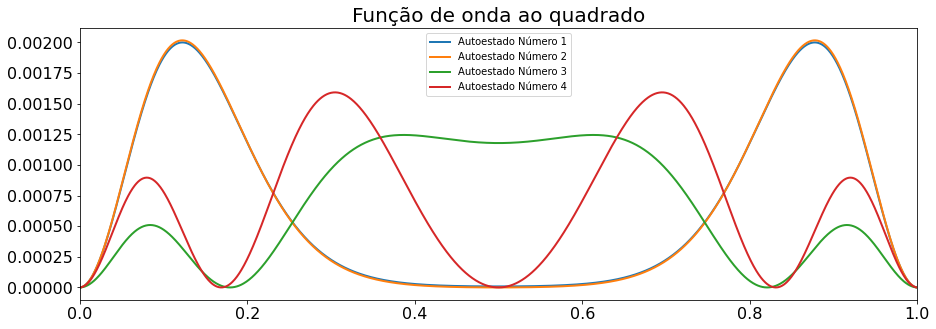

In [158]:
def V_2(x): #definindo a função potencial  
    return 2000*np.exp(-(x-0.5)**2)-1550

x = np.linspace(0,1,N)
y = V_2(x)
plt.figure(figsize=(15,5))
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 20)
plt.show()

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V_2(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i]**2,lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda ao quadrado',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

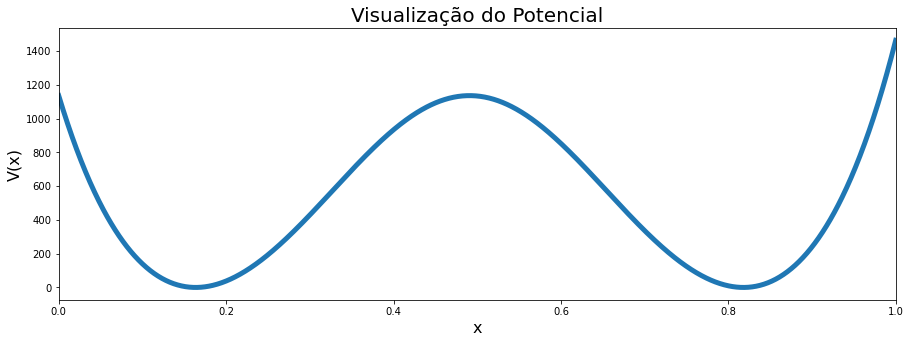

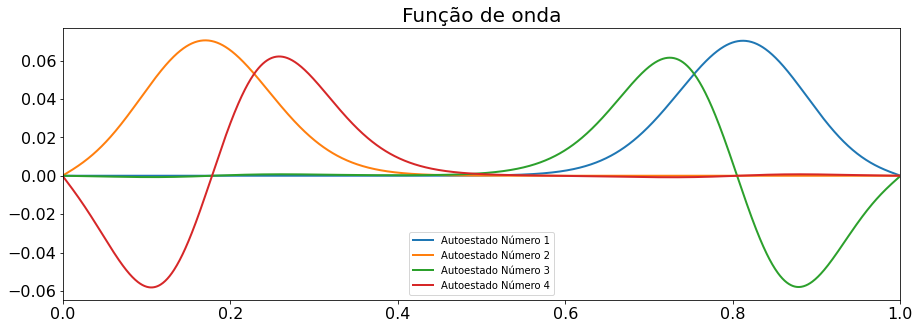

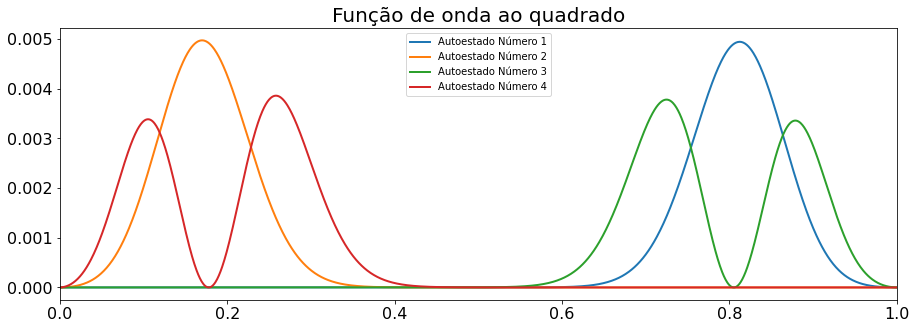

In [157]:
def V_2(x): #definindo a função potencial  
    return 4000*(np.exp((np.sin(3.2*x)-0.5)**2)-1)

x = np.linspace(0,1,N)
y = V_2(x)
plt.figure(figsize=(15,5))
plt.plot(x,y,lw = 5)
plt.xlim(0,1)
#plt.ylim(-0.25,0.25)
plt.xlabel("x",fontsize = 16)
plt.ylabel("V(x)",fontsize = 16)
plt.title('Visualização do Potencial',fontsize = 20)
plt.show()

x = np.linspace(0,1,N+1)

d = 1/(dx**2) + V_2(x) # Definimos os elementos da diagonal principal 
e = -np.ones(N)/(dx**2) # E os elementos das diagoanais imediatamente a cima e abaixo da principal

w, v = eigh_tridiagonal(d,e)

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i],lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(x,v.T[i]**2,lw = 2,label = 'Autoestado Número '+str(i+1))
plt.title('Função de onda ao quadrado',fontsize = 20)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()